## R magic

In [3]:
# activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


## Manually check

read the file, you can see here are some NA values and unreasonable values.

In [6]:
%%R
dirty_iris <- read.csv("https://raw.githubusercontent.com/edwindj/datacleaning/master/data/dirty_iris.csv",
                     stringsAsFactors = FALSE)
dirty_iris

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1            6.4         3.2        4.500         1.5 versicolor
2            6.3         3.3        6.000         2.5  virginica
3            6.2          NA        5.400         2.3  virginica
4            5.0         3.4        1.600         0.4     setosa
5            5.7         2.6        3.500         1.0 versicolor
6            5.3          NA           NA         0.2     setosa
7            6.4         2.7        5.300          NA  virginica
8            5.9         3.0        5.100         1.8  virginica
9            5.8         2.7        4.100         1.0 versicolor
10           4.8         3.1        1.600         0.2     setosa
11           5.0         3.5        1.600         0.6     setosa
12           6.0         2.7        5.100         1.6 versicolor
13           6.0         3.0        4.800          NA  virginica
14           6.8         2.8        4.800         1.4 versicolor
15            NA         

make sure the strings are not converted to factor

In [7]:
%%R
str(dirty_iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  6.4 6.3 6.2 5 5.7 5.3 6.4 5.9 5.8 4.8 ...
 $ Sepal.Width : num  3.2 3.3 NA 3.4 2.6 NA 2.7 3 2.7 3.1 ...
 $ Petal.Length: num  4.5 6 5.4 1.6 3.5 NA 5.3 5.1 4.1 1.6 ...
 $ Petal.Width : num  1.5 2.5 2.3 0.4 1 0.2 NA 1.8 1 0.2 ...
 $ Species     : chr  "versicolor" "virginica" "virginica" "setosa" ...


check the complete observations, if all elements in the observation is available, then return TRUE

In [8]:
%%R
check_complete <- complete.cases(dirty_iris)

calculate the number and percentage of observations that are complete.

In [9]:
%%R
bad_obj <- length(which(check_complete == FALSE)) # bad obj
good_obj <- length(which(check_complete == TRUE)) # true obj
print(good_obj / (bad_obj + good_obj))

[1] 0.64


## check with rules
We use dirty_iris as original dataset

### install package editrules

In [10]:
%%R
install.packages("editrules")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/editrules_2.9.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 643453 bytes (628 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [11]:
%%R
library(editrules)

R[write to console]: Loading required package: igraph

R[write to console]: 
Attaching package: ‘igraph’


R[write to console]: The following objects are masked from ‘package:stats’:

    decompose, spectrum


R[write to console]: The following object is masked from ‘package:base’:

    union


R[write to console]: 
Attaching package: ‘editrules’


R[write to console]: The following objects are masked from ‘package:igraph’:

    blocks, normalize




now we can use editrules, locating to the path

In [12]:
%cd /content/drive/My Drive/Colab Notebooks/AI_relative/
!ls
%cd Data_mining_in_R/
!ls

/content/drive/My Drive/Colab Notebooks/AI_relative
algorithm_explore  deep_learning_GAN  NLP_tutorial	 pytorch_study
Data_mining_in_R   GAN_sad.ipynb      push_to_git.ipynb
/content/drive/My Drive/Colab Notebooks/AI_relative/Data_mining_in_R
check_and_imputation.ipynb  dirty_iris_check.txt  dirty_iris_correct.txt


read these rules  
– Species should be one of the following values: setosa, versicolor or virginica.  
– All measured numerical properties of an iris should be positive.  
– The petal length of an iris is at least 2 times its petal width.  
– The sepal length of an iris cannot exceed 30 cm.  
– The sepals of an iris are longer than its petals.  


In [13]:
%%R
rules <- editfile("dirty_iris_check.txt")
rules


Data model:
dat1 : Species %in% c('setosa', 'versicolor', 'virginica') 

Edit set:
num1 : 0 < Sepal.Length
num2 : 0 < Sepal.Width
num3 : 0 < Petal.Length
num4 : 0 < Petal.Width
num5 : 2*Petal.Width <= Petal.Length
num6 : Sepal.Length <= 30
num7 : Petal.Length < Sepal.Length 


check by rules, FALSE means not violate

In [14]:
%%R
ve <- violatedEdits(rules, dirty_iris) # column can't be accessed by $
# data.frame(ve)$num1

Determine how often each rule is broken (violatedEdits). Also summarize and plot the
result.

Edit violations, 150 observations, 0 completely missing (0%):

 editname freq  rel
     num5    4 2.7%
     num2    2 1.3%
     num6    2 1.3%
     num7    2 1.3%
     num1    1 0.7%
     num3    1 0.7%

Edit violations per record:

 errors freq   rel
      0   90   60%
      1   18   12%
      2   12    8%
      3   25 16.7%
      4    4  2.7%
      5    1  0.7%


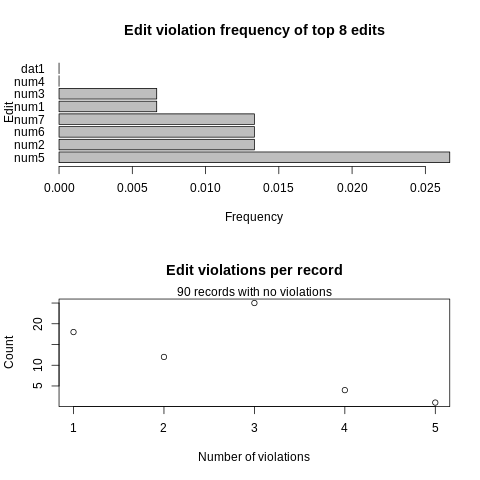

In [15]:
%%R
summary(ve)
plot(ve)
# For example num1 is 0 < Sepal.Length. only one obj has negative value
# every empty value is counted as one edit violation when counting violations per record.


check who violates the num1 rules

In [16]:
%%R
dirty_iris[data.frame(ve)$num1 == TRUE & !is.na(data.frame(ve)$num1), ]

   Sepal.Length Sepal.Width Petal.Length Petal.Width Species
43            0          NA          1.3         0.4  setosa


What percentage of the data has no errors?  
Here you will see 90 objs have 0 errors

In [17]:
%%R
summary(ve)

Edit violations, 150 observations, 0 completely missing (0%):

 editname freq  rel
     num5    4 2.7%
     num2    2 1.3%
     num6    2 1.3%
     num7    2 1.3%
     num1    1 0.7%
     num3    1 0.7%

Edit violations per record:

 errors freq   rel
      0   90   60%
      1   18   12%
      2   12    8%
      3   25 16.7%
      4    4  2.7%
      5    1  0.7%


Find out which observations have too long petals using the result of violatedEdits.  
check who violate num7


In [18]:
%%R
dirty_iris[data.frame(ve)$num7 == TRUE & !is.na(data.frame(ve)$num7), ]

   Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
35          6.6         2.9         23.0         1.3 versicolor
43          0.0          NA          1.3         0.4     setosa


## Find outliers and modify
Here we use old dirty_iris dataset since no violation values has been corrected

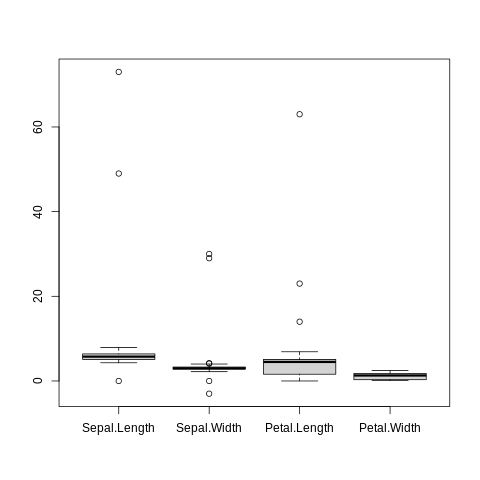

In [19]:
%%R
boxplot(dirty_iris[c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width")])

replace outliers with NA

In [20]:
%%R
print(boxplot.stats(dirty_iris[c("Sepal.Length")])$out)
print(boxplot.stats(dirty_iris[c("Sepal.Width")])$out)
print(boxplot.stats(dirty_iris[c("Petal.Length")])$out)
print(boxplot.stats(dirty_iris[c("Petal.Width")])$out)

[1] 73  0 49
[1] -3.0 29.0  4.2  4.1 30.0  0.0
[1] 63 23 14
[1] Inf


In [21]:
%%R
dirty_iris$Sepal.Length <- ifelse(dirty_iris$Sepal.Length 
                                          %in% boxplot.stats(dirty_iris[c("Sepal.Length")])$out,
                                          NA, dirty_iris$Sepal.Length)
dirty_iris$Sepal.Width <- ifelse(dirty_iris$Sepal.Width
                                          %in% boxplot.stats(dirty_iris[c("Sepal.Width")])$out,
                                          NA, dirty_iris$Sepal.Width)
dirty_iris$Petal.Length <- ifelse(dirty_iris$Petal.Length 
                                          %in% boxplot.stats(dirty_iris[c("Petal.Length")])$out,
                                          NA, dirty_iris$Petal.Length)
dirty_iris$Petal.Width <- ifelse(dirty_iris$Petal.Width 
                                          %in% boxplot.stats(dirty_iris[c("Petal.Width")])$out,
                                          NA, dirty_iris$Petal.Width)

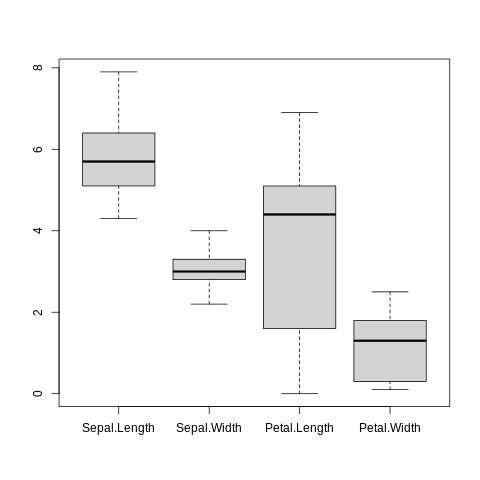

In [22]:
%%R
boxplot(dirty_iris[c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width")])

check the violation values

In [23]:
%%R
summary(violatedEdits(rules, dirty_iris))

Edit violations, 150 observations, 0 completely missing (0%):

 editname freq  rel
     num5    3   2%
     num3    1 0.7%

Edit violations per record:

 errors freq   rel
      0   88 58.7%
      1   17 11.3%
      2   13  8.7%
      3   24   16%
      4    5  3.3%
      5    1  0.7%
      6    1  0.7%
      7    1  0.7%


## correct it (need a new dirty_iris dataset)
need to use a new dirty_iris_new dataset since outlier in old one has been modified     
Replace non positive values from Petal.Width with NA

In [45]:
%%R
dirty_iris_new <- read.csv("https://raw.githubusercontent.com/edwindj/datacleaning/master/data/dirty_iris.csv",
                     stringsAsFactors = FALSE)
dirty_iris_new

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1            6.4         3.2        4.500         1.5 versicolor
2            6.3         3.3        6.000         2.5  virginica
3            6.2          NA        5.400         2.3  virginica
4            5.0         3.4        1.600         0.4     setosa
5            5.7         2.6        3.500         1.0 versicolor
6            5.3          NA           NA         0.2     setosa
7            6.4         2.7        5.300          NA  virginica
8            5.9         3.0        5.100         1.8  virginica
9            5.8         2.7        4.100         1.0 versicolor
10           4.8         3.1        1.600         0.2     setosa
11           5.0         3.5        1.600         0.6     setosa
12           6.0         2.7        5.100         1.6 versicolor
13           6.0         3.0        4.800          NA  virginica
14           6.8         2.8        4.800         1.4 versicolor
15            NA         

In [46]:
%%R
rules


Data model:
dat1 : Species %in% c('setosa', 'versicolor', 'virginica') 

Edit set:
num1 : 0 < Sepal.Length
num2 : 0 < Sepal.Width
num3 : 0 < Petal.Length
num4 : 0 < Petal.Width
num5 : 2*Petal.Width <= Petal.Length
num6 : Sepal.Length <= 30
num7 : Petal.Length < Sepal.Length 


which petal.width is negative or 0

In [47]:
%%R
ve_new <- violatedEdits(rules, dirty_iris_new) # column can't be accessed by $
ve_new

      edit
record  num1  num2  num3  num4  num5  num6  num7  dat1
   1   FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   2   FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   3   FALSE    NA FALSE FALSE FALSE FALSE FALSE FALSE
   4   FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   5   FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   6   FALSE    NA    NA FALSE    NA FALSE    NA FALSE
   7   FALSE FALSE FALSE    NA    NA FALSE FALSE FALSE
   8   FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   9   FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   10  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   11  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   12  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   13  FALSE FALSE FALSE    NA    NA FALSE FALSE FALSE
   14  FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   15     NA FALSE FALSE FALSE FALSE    NA    NA FALSE
   16  FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
   17  FALSE    NA FALSE FALSE FALSE FALSE FALSE FALSE

check before modify the value, we can see num1 here

In [48]:
%%R
summary(ve_new)

Edit violations, 150 observations, 0 completely missing (0%):

 editname freq  rel
     num5    4 2.7%
     num2    2 1.3%
     num6    2 1.3%
     num7    2 1.3%
     num1    1 0.7%
     num3    1 0.7%

Edit violations per record:

 errors freq   rel
      0   90   60%
      1   18   12%
      2   12    8%
      3   25 16.7%
      4    4  2.7%
      5    1  0.7%


let's modify Sepal.Length whose value is 0 to NA(43)

### intall deducorrect package first

In [28]:
%%R
install.packages("deducorrect")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/deducorrect_1.3.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1324734 bytes (1.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [29]:
%%R
library("deducorrect")

In [49]:
%%R
correct <- correctionRules("dirty_iris_correct.txt")
correct

Object of class 'correctionRules'
##  1-------
  if (!is.na(Sepal.Length) & Sepal.Length <= 0) {
      Sepal.Length <- NA
  } 


In [50]:
%%R
correction <- correctWithRules(correct, dirty_iris_new)
correction$correction # see who is modified

  row     variable old new
1  43 Sepal.Length   0  NA
                                                                   how
1 if (!is.na(Sepal.Length) & Sepal.Length <= 0) { Sepal.Length <- NA }


correct the value of dirty_iris_new

In [51]:
%%R
dirty_iris_new <- correction$corrected

now check how many still violation still left

In [52]:
%%R
ve_new <- violatedEdits(rules, dirty_iris_new)
summary(ve_new)
rules
# num1 gone

Edit violations, 150 observations, 0 completely missing (0%):

 editname freq  rel
     num5    4 2.7%
     num2    2 1.3%
     num6    2 1.3%
     num3    1 0.7%
     num7    1 0.7%

Edit violations per record:

 errors freq  rel
      0   90  60%
      1   18  12%
      2   12   8%
      3   24  16%
      4    5 3.3%
      5    1 0.7%

Data model:
dat1 : Species %in% c('setosa', 'versicolor', 'virginica') 

Edit set:
num1 : 0 < Sepal.Length
num2 : 0 < Sepal.Width
num3 : 0 < Petal.Length
num4 : 0 < Petal.Width
num5 : 2*Petal.Width <= Petal.Length
num6 : Sepal.Length <= 30
num7 : Petal.Length < Sepal.Length 


### find location of there errerous values
let's replace all values erronous with NA  

In [53]:
%%R
le <- localizeErrors(rules, dirty_iris_new, method="mip")
le$adapt

    Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          FALSE       FALSE        FALSE       FALSE   FALSE
2          FALSE       FALSE        FALSE       FALSE   FALSE
3          FALSE        TRUE        FALSE       FALSE   FALSE
4          FALSE       FALSE        FALSE       FALSE   FALSE
5          FALSE       FALSE        FALSE       FALSE   FALSE
6          FALSE        TRUE         TRUE       FALSE   FALSE
7          FALSE       FALSE        FALSE        TRUE   FALSE
8          FALSE       FALSE        FALSE       FALSE   FALSE
9          FALSE       FALSE        FALSE       FALSE   FALSE
10         FALSE       FALSE        FALSE       FALSE   FALSE
11         FALSE       FALSE        FALSE       FALSE   FALSE
12         FALSE       FALSE        FALSE       FALSE   FALSE
13         FALSE       FALSE        FALSE        TRUE   FALSE
14         FALSE       FALSE        FALSE       FALSE   FALSE
15          TRUE       FALSE        FALSE       FALSE   FALSE
16      

modify it

In [57]:
%%R
dirty_iris_new[le$adapt] <- NA


test the violations again

In [58]:
%%R
ve_new <- violatedEdits(rules, dirty_iris_new)
summary(ve_new)

Edit violations, 150 observations, 0 completely missing (0%):

 editname freq  rel
     num5    1 0.7%

Edit violations per record:

 errors freq   rel
      0   90   60%
      1   16 10.7%
      2   10  6.7%
      3   27   18%
      4    4  2.7%
      5    2  1.3%
      6    1  0.7%


we still have one violation against num5, check it

In [59]:
%%R
le <- localizeErrors(rules, dirty_iris_new, method="mip") # we still have TRUE but they are NA values
dirty_iris_new[le$adapt]

 [1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA


all values against rules are NA

## Imputing, handle with missing values
Here we use previous dirty_iris_new since all erronous values has been changed

### install packages

In [41]:
%%R
install.packages("VIM")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘car’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/car_3.0-10.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 501293 bytes (489 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console

In [42]:
%%R
library(VIM)

R[write to console]: Loading required package: colorspace

R[write to console]: Loading required package: grid

R[write to console]: VIM is ready to use.


R[write to console]: Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues

R[write to console]: 
Attaching package: ‘VIM’


R[write to console]: The following object is masked from ‘package:datasets’:

    sleep




### use Knn to impute

copy dirty_iris_new to dirty_iris_new_1 because we need to test imputation twice

In [62]:
%%R
dirty_iris_new_1 <- dirty_iris_new
dirty_iris_new_1 <- kNN(dirty_iris_new_1)
dirty_iris_new_1

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1            6.4         3.2        4.500         1.5 versicolor
2            6.3         3.3        6.000         2.5  virginica
3            6.2         2.8        5.400         2.3  virginica
4            5.0         3.4        1.600         0.4     setosa
5            5.7         2.6        3.500         1.0 versicolor
6            5.3         3.7        1.500         0.2     setosa
7            6.4         2.7        5.300         2.0  virginica
8            5.9         3.0        5.100         1.8  virginica
9            5.8         2.7        4.100         1.0 versicolor
10           4.8         3.1        1.600         0.2     setosa
11           5.0         3.5        1.600         0.6     setosa
12           6.0         2.7        5.100         1.6 versicolor
13           6.0         3.0        4.800         1.8  virginica
14           6.8         2.8        4.800         1.4 versicolor
15           5.2         

### use sequential hot deck to impute

define the function

In [63]:
%%R
seqImpute <- function(x, last){
  n <- length(x)
  x <- c(x, last)
  i <- is.na(x)
  while(any(i)){
    x[i] <- x[which(i) + 1]
    i <- is.na(x)
  }
  x[1:n]
}

execute

In [68]:
%%R
dirty_iris_new_2 <- dirty_iris_new
dirty_iris_new_2 <- dirty_iris_new_2[order(dirty_iris_new_2$Species),]
dirty_iris_new_2

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
4            5.0         3.4        1.600         0.4     setosa
6            5.3          NA           NA         0.2     setosa
10           4.8         3.1        1.600         0.2     setosa
11           5.0         3.5        1.600         0.6     setosa
15            NA         3.9        1.700         0.4     setosa
18           4.7         3.2        1.300         0.2     setosa
19            NA         4.0           NA         0.2     setosa
21           4.9         3.6           NA         0.1     setosa
26           4.6         3.2        1.400         0.2     setosa
27           4.9         3.1        1.500         0.1     setosa
31           4.4         3.2           NA         0.2     setosa
36           4.8         3.0        1.400         0.1     setosa
40           5.0         3.0        1.600         0.2     setosa
41           5.0          NA        1.200         0.2     setosa
43            NA         

on Petal.Width

In [69]:
%%R
dirty_iris_new_2$Petal.Width <- seqImpute(dirty_iris_new_2$Petal.Width, 2)
dirty_iris_new_2

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
4            5.0         3.4        1.600         0.4     setosa
6            5.3          NA           NA         0.2     setosa
10           4.8         3.1        1.600         0.2     setosa
11           5.0         3.5        1.600         0.6     setosa
15            NA         3.9        1.700         0.4     setosa
18           4.7         3.2        1.300         0.2     setosa
19            NA         4.0           NA         0.2     setosa
21           4.9         3.6           NA         0.1     setosa
26           4.6         3.2        1.400         0.2     setosa
27           4.9         3.1        1.500         0.1     setosa
31           4.4         3.2           NA         0.2     setosa
36           4.8         3.0        1.400         0.1     setosa
40           5.0         3.0        1.600         0.2     setosa
41           5.0          NA        1.200         0.2     setosa
43            NA         

on Sepal.Length

In [70]:
%%R
dirty_iris_new_2$Sepal.Length <- seqImpute(dirty_iris_new_2$Sepal.Length, 6)
dirty_iris_new_2

    Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
4            5.0         3.4        1.600         0.4     setosa
6            5.3          NA           NA         0.2     setosa
10           4.8         3.1        1.600         0.2     setosa
11           5.0         3.5        1.600         0.6     setosa
15           4.7         3.9        1.700         0.4     setosa
18           4.7         3.2        1.300         0.2     setosa
19           4.9         4.0           NA         0.2     setosa
21           4.9         3.6           NA         0.1     setosa
26           4.6         3.2        1.400         0.2     setosa
27           4.9         3.1        1.500         0.1     setosa
31           4.4         3.2           NA         0.2     setosa
36           4.8         3.0        1.400         0.1     setosa
40           5.0         3.0        1.600         0.2     setosa
41           5.0          NA        1.200         0.2     setosa
43           5.5         